In [2]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [3]:
#1) Acquiring data and importing the data
data = pd.read_csv('TSLA.csv')
data

,Date,Open,High,Low,Close,Adj Close,Volume
0,2010-06-29,3.800000,5.000000,3.508000,4.778000,4.778000,93831500
1,2010-06-30,5.158000,6.084000,4.660000,4.766000,4.766000,85935500
2,2010-07-01,5.000000,5.184000,4.054000,4.392000,4.392000,41094000
3,2010-07-02,4.600000,4.620000,3.742000,3.840000,3.840000,25699000
4,2010-07-06,4.000000,4.000000,3.166000,3.222000,3.222000,34334500
...,...,...,...,...,...,...,...
2951,2022-03-18,874.489990,907.849976,867.390015,905.390015,905.390015,33408500
2952,2022-03-21,914.979980,942.849976,907.090027,921.159973,921.159973,27327200
2953,2022-03-22,930.000000,997.859985,921.750000,993.979980,993.979980,35289500
2954,2022-03-23,979.940002,1040.699951,976.400024,999.109985,999.109985,40225400


In [5]:
#2) Data Preprocessing for Time Series Data
data['Date'] = pd.to_datetime(data.Date,format='%Y-%m-%d')
data.index = data['Date']

In [6]:
data.dtypes

Date         datetime64[ns]
Open                float64
High                float64
Low                 float64
Close               float64
Adj Close           float64
Volume                int64
dtype: object

In [7]:
# 3) Data Cleaning: Handling Missing Values
data.dropna(inplace=True)

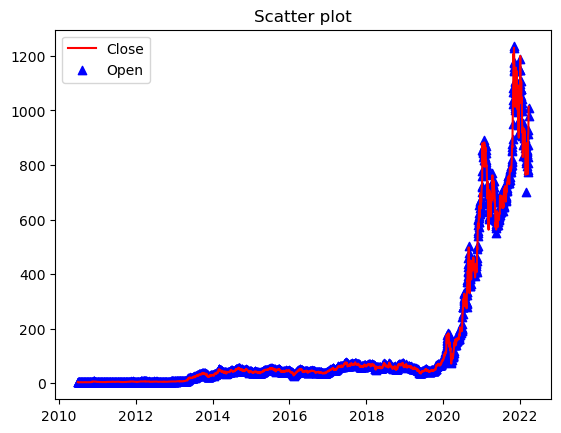

In [8]:
#Scatter Plot
plt.title("Scatter plot")
plt.plot(data['Date'],data['Close'],c = 'red' )
plt.scatter(data['Date'],data['Open'],c = 'blue', marker = '^')
plt.legend(['Close','Open'])

C:\Users\PIYUSH SHARMA\AppData\Local\Temp\ipykernel_14952\1991127662.py:5: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sb.heatmap(data.corr() > 0.9, annot=True, cbar=False)


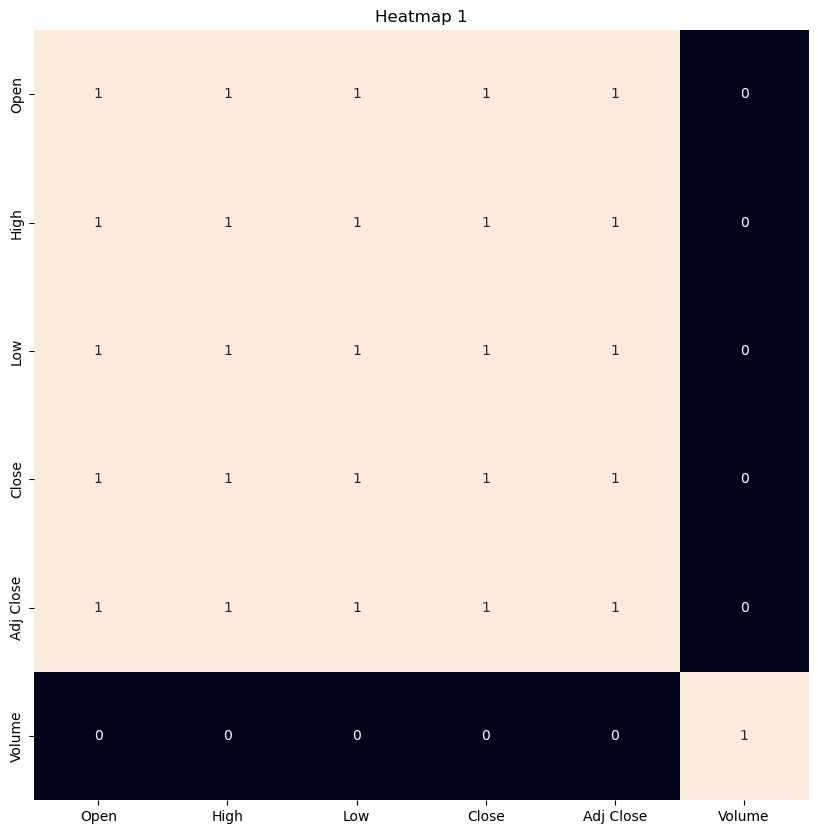

In [9]:
# HEATMAP 1

plt.figure(figsize=(10, 10))
# Since we deal with the highly correlated features only so, we visualize our heatmap as per that criteria only.
sb.heatmap(data.corr() > 0.9, annot=True, cbar=False)
plt.title("Heatmap 1")
plt.show()

C:\Users\PIYUSH SHARMA\AppData\Local\Temp\ipykernel_14952\1803164863.py:5: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(2,3,i+1)


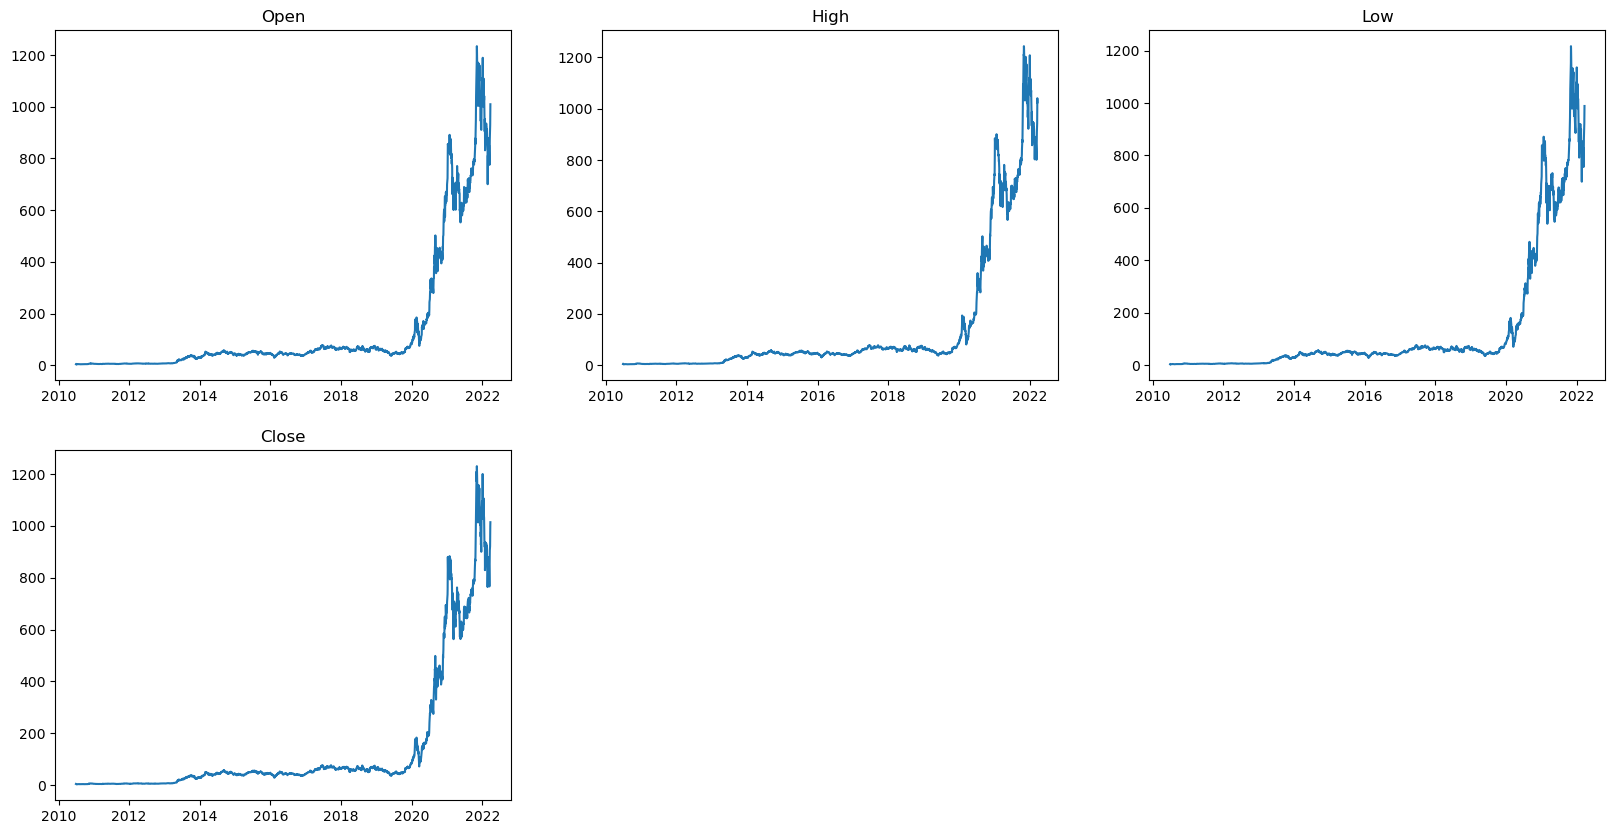

In [11]:
# OHLC charts
plt.subplots(figsize=(20,10))

for i,cols in enumerate(['Open','High','Low','Close']):
    plt.subplot(2,3,i+1)
    plt.title(cols)
    plt.plot(data[cols])
plt.show()

C:\Users\PIYUSH SHARMA\AppData\Local\Temp\ipykernel_14952\2423533094.py:5: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(2,3,i+1)


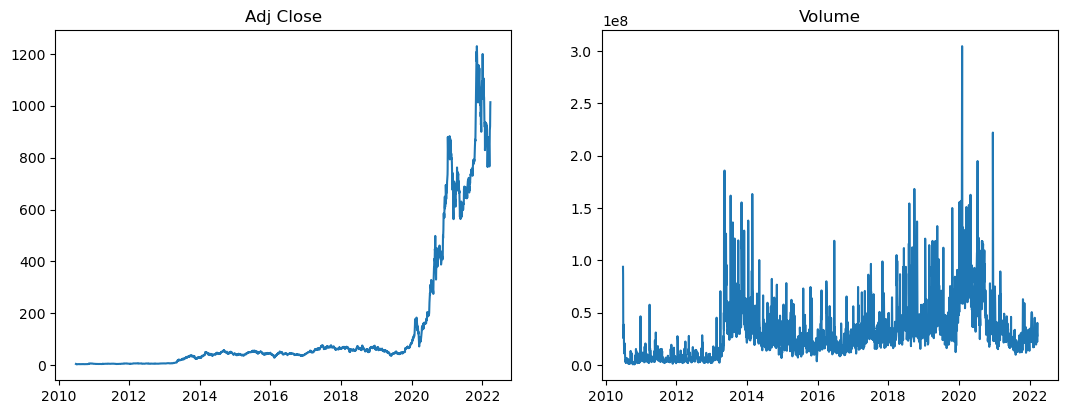

In [12]:
# VALUE and VOLUME charts
plt.subplots(figsize=(20,10))

for i,cols in enumerate(['Adj Close','Volume']):
    plt.subplot(2,3,i+1)
    plt.title(cols)
    plt.plot(data[cols])
plt.show()

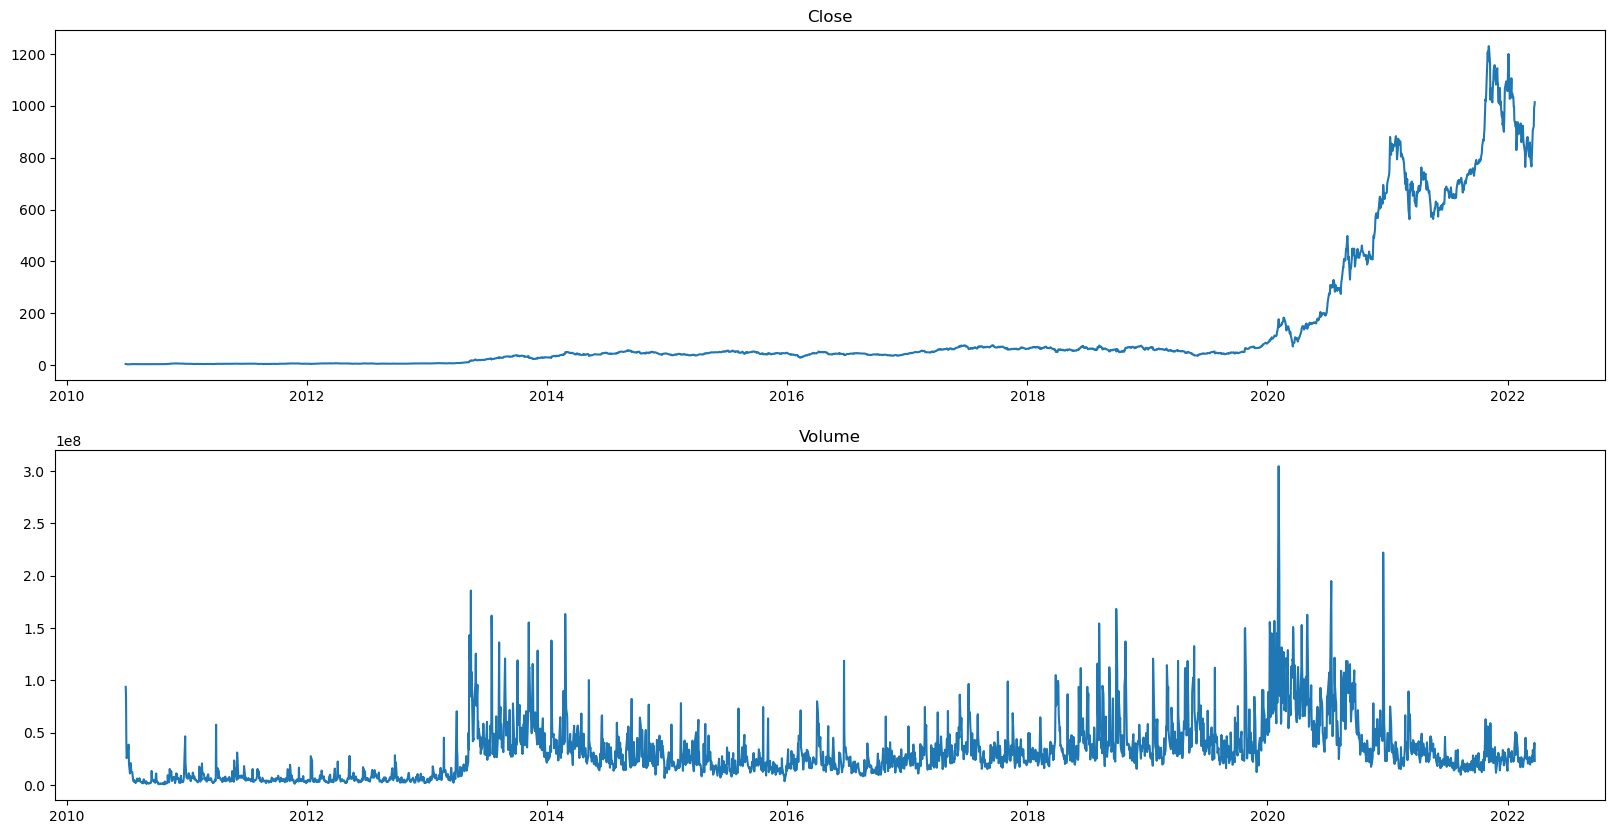

In [13]:
fig, axs = plt.subplots(2, figsize=(20,10))

axs[0].plot(data['Close'])
axs[0].set_title("Close")
axs[1].plot(data['Volume'])
axs[1].set_title("Volume")
plt.show()

C:\Users\PIYUSH SHARMA\AppData\Local\Temp\ipykernel_14952\2430375216.py:6: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(2,3,i+1)
C:\Users\PIYUSH SHARMA\AppData\Local\Temp\ipykernel_14952\2430375216.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sb.distplot(data[col])
C:\Users\PIYUSH SHARMA\AppData\Local\Temp\ipykernel_14952\2430375216.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
sim

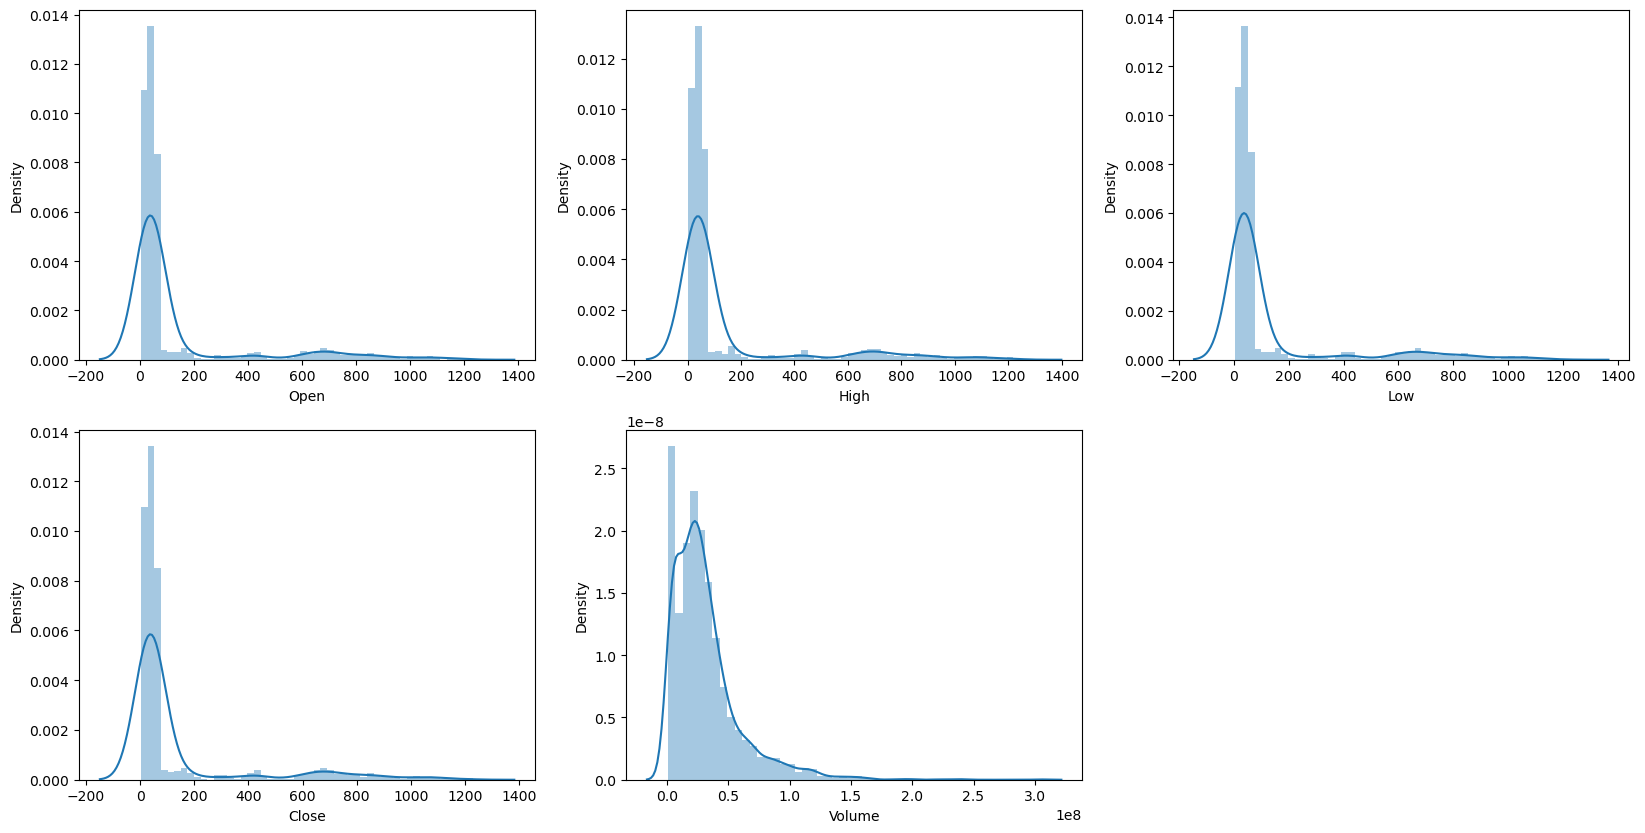

In [14]:
ohlc = ['Open', 'High', 'Low', 'Close', 'Volume']

plt.subplots(figsize=(20,10))

for i, col in enumerate(ohlc):
  plt.subplot(2,3,i+1)
  sb.distplot(data[col])
plt.show()

C:\Users\PIYUSH SHARMA\AppData\Local\Temp\ipykernel_14952\2848677779.py:6: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_grouped = data.groupby('month').mean()
C:\Users\PIYUSH SHARMA\AppData\Local\Temp\ipykernel_14952\2848677779.py:11: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(2,2,i+1)


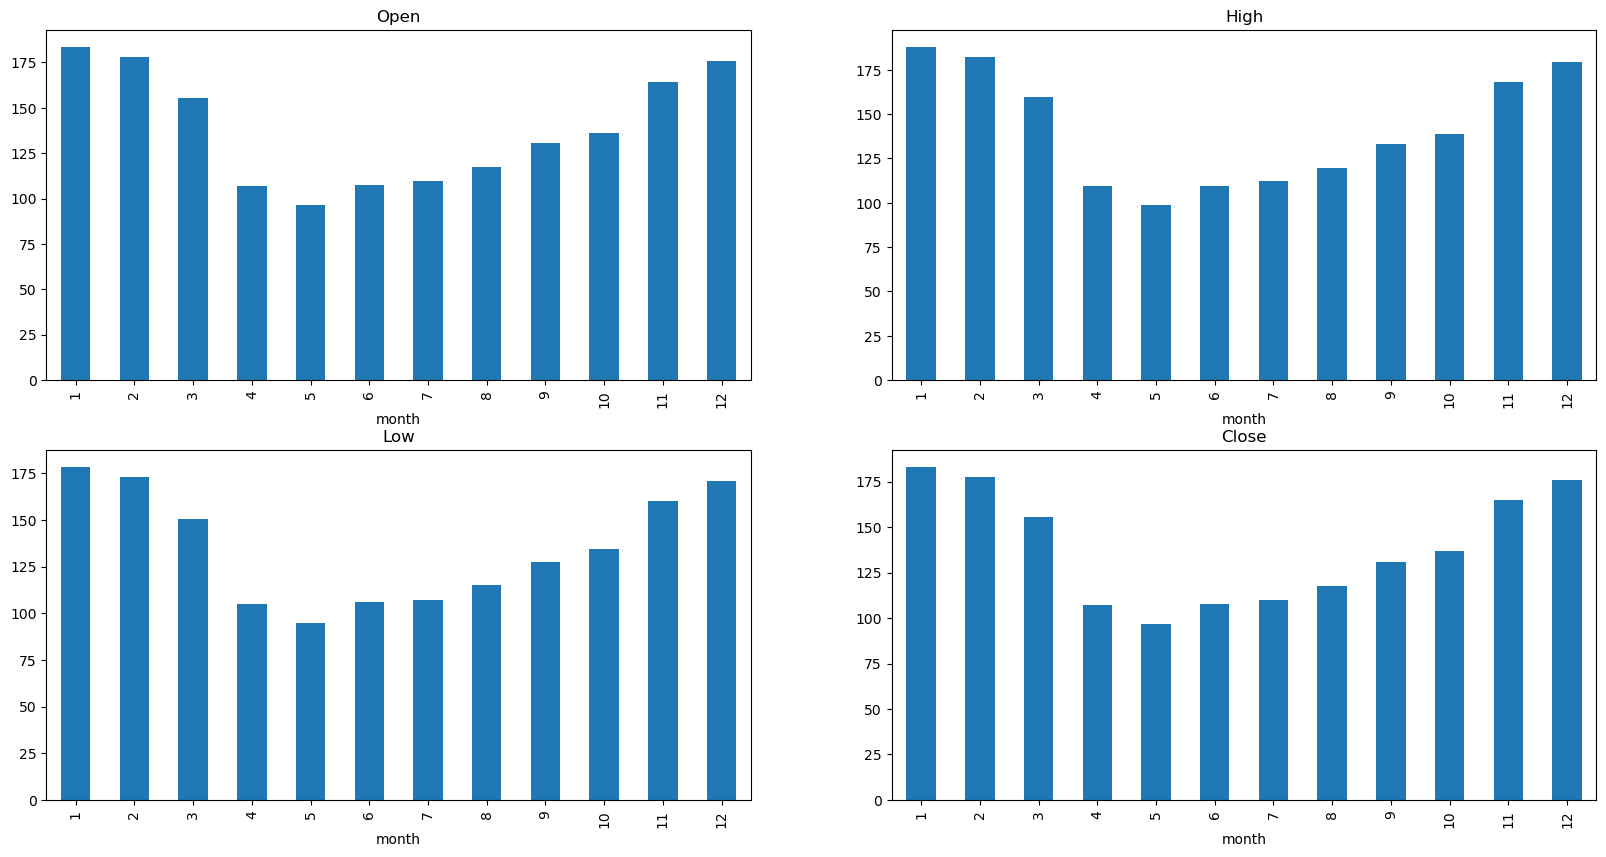

In [15]:
data['day'] = data.index.day
data['month'] = data.index.month
data['year'] = data.index.year

data['is_quarter_end'] = np.where(data['month']%3==0,1,0)
data_grouped = data.groupby('month').mean()
plt.subplots(figsize=(20,10))

for i, col in enumerate(['Open', 'High', 'Low', 'Close']):

    plt.subplot(2,2,i+1)
    plt.title(col)
    data_grouped[col].plot.bar()
plt.show()

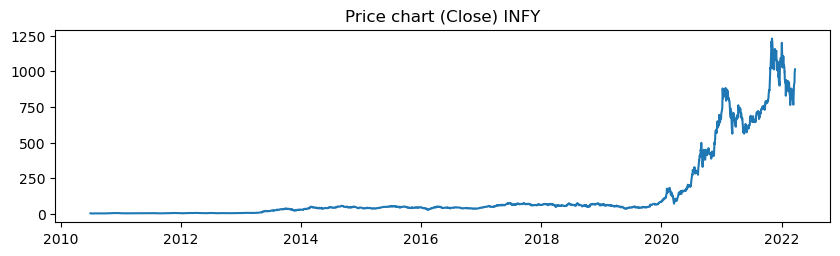

In [16]:
plt.figure(figsize=(10,2.5))
plt.plot(data['Date'], data['Close'])
plt.title('Price chart (Close) INFY')
plt.show()

In [23]:
#5) Selecting the feature set and target variable :Feature Selection
target_var = pd.DataFrame(data['Close'])
features = data[['Open', 'High', 'Low','Close','Adj Close',  'Volume']]

In [20]:
#6) Scaling the features to a particular range: Feature Scaling
scaler = StandardScaler()
feature_transform = scaler.fit_transform(features)
feature_transform

array([[-0.5395597 , -0.53464008, -0.54123978, -0.53576357, -0.53576357,
         2.23441875],
       [-0.53412776, -0.53040273, -0.5365133 , -0.53581155, -0.53581155,
         1.95220804],
       [-0.53475975, -0.53392083, -0.53899963, -0.53730707, -0.53730707,
         0.34952933],
       ...,
       [ 3.16520264,  3.34644878,  3.22617088,  3.41976587,  3.41976587,
         0.14207087],
       [ 3.36496062,  3.51391018,  3.45039182,  3.44027926,  3.44027926,
         0.31848472],
       [ 3.48411932,  3.45054545,  3.50126703,  3.49950011,  3.49950011,
        -0.30067398]])

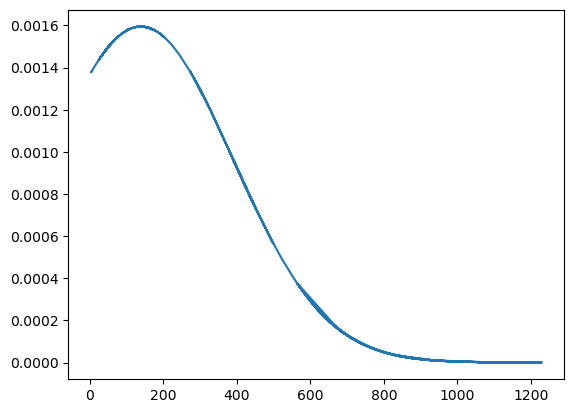

In [21]:
from scipy.stats import norm
import statistics


x_axis = target_var['Close']

# Calculating mean and standard deviation
mean = statistics.mean(x_axis)
sd = statistics.stdev(x_axis)

plt.plot(x_axis, norm.pdf(x_axis, mean, sd))
plt.show()

In [22]:
#7) Splitting the dataset into Train set and Test set by 80/20
X_train, X_test, y_train, y_test = train_test_split(feature_transform, target_var, test_size=0.2, random_state=42)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(2364, 6) (592, 6) (2364, 1) (592, 1)
